In [1]:
from abel import HALHFgg, PWFACollider, Collider
%load_ext autoreload
%autoreload 2

## PWFA Collider

In [2]:
pwfa_collider = PWFACollider()
pwfa_collider.com_energy = 10e12
pwfa_collider.run('pwfa_collider_example', overwrite=True)

>> LINAC #1
Tracked #0  SourceBasic             (s =    3.2 m) :   E =   0.1 GeV, Q = -1.60 nC, σz =  17.5 µm, σE =  1.0%, ε =   1.0/1.0 mm-mrad
    ... #1  RFAcceleratorBasic      (s =  249.4 m) :   E =   5.0 GeV, Q = -1.60 nC, σz =  17.5 µm, σE =  0.0%, ε =   1.0/1.0 mm-mrad
    ... #2  StageBasic #1           (s =  263.3 m) :   E =  46.7 GeV, Q = -1.60 nC, σz =  17.5 µm, σE =  0.0%, ε =   1.0/1.0 mm-mrad
    ... #3  InterstageBasic         (s =  275.1 m) :   E =  46.7 GeV, Q = -1.60 nC, σz =  17.5 µm, σE =  0.0%, ε =   1.0/1.0 mm-mrad
    ... #4  StageBasic #2           (s =  288.9 m) :   E =  88.3 GeV, Q = -1.60 nC, σz =  17.5 µm, σE =  0.0%, ε =   1.0/1.0 mm-mrad
    ... #5  InterstageBasic         (s =  305.5 m) :   E =  88.3 GeV, Q = -1.60 nC, σz =  17.5 µm, σE =  0.0%, ε =   1.0/1.0 mm-mrad
    ... #6  StageBasic #3           (s =  319.4 m) :   E = 130.0 GeV, Q = -1.60 nC, σz =  17.5 µm, σE =  0.0%, ε =   1.0/1.0 mm-mrad
    ... #7  InterstageBasic         (s =  339.7 m) :   E 

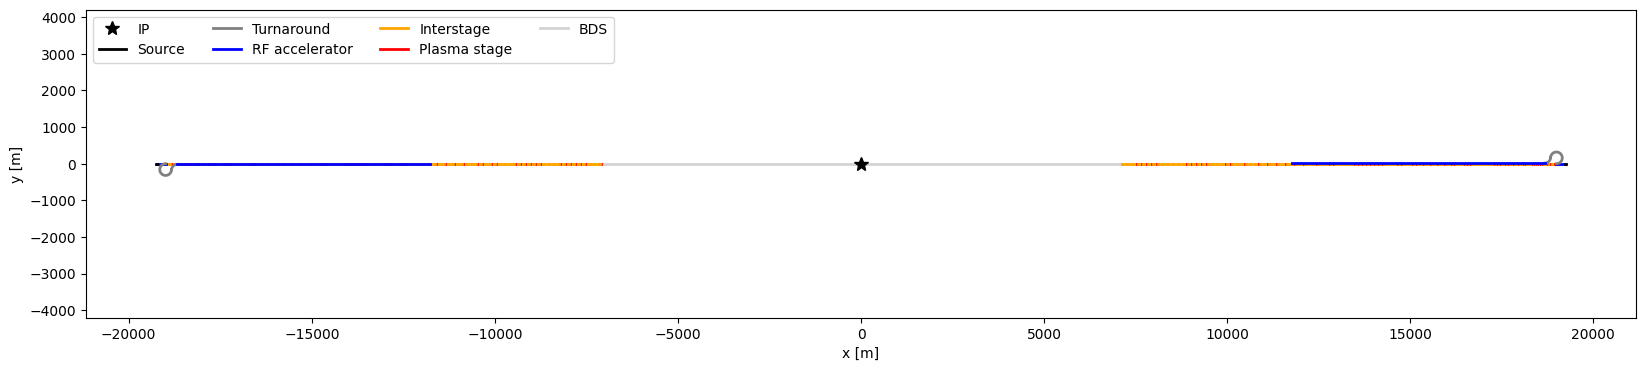

In [3]:
pwfa_collider.plot_survey()

In [4]:
pwfa_collider.print_cost()
return

-- COSTS -----------------------------------------
-- Construction: 11286 MILCU
   -- Plasma linac: 4625 MILCU
      -- Polarized electron source: 82 MILCU
      -- RF injector: 36 MILCU
         -- Instrumented beamline (25%): 1 MILCU
         -- RF structures (74x): 21 MILCU
         -- Klystrons (74x, 8 MW peak, 120 kW avg): 14 MILCU
      -- Driver complex: 2095 MILCU
         -- Source: 10 MILCU
         -- Driver RF linac: 1825 MILCU
            -- Instrumented beamline (25%): 27 MILCU
            -- RF structures (739x): 595 MILCU
            -- Klystrons (740x, 24 MW peak, 361 kW avg): 1204 MILCU
         -- Turnaround: 45 MILCU
         -- Civil construction: 215 MILCU
            -- Driver source: 0 MILCU
            -- Driver RF linac: 214 MILCU
            -- TurnaroundBasic: 0 MILCU
      -- Plasma stages (120x): 77 MILCU
      -- Interstages: 413 MILCU
      -- Driver dumps (120x, 32 MW total): 77 MILCU
      -- Driver delay chicanes (left+right): 961 MILCU
      -- BDS (

SyntaxError: 'return' outside function (3195067510.py, line 2)

In [ ]:
pwfa_collider = HALHFgg()
pwfa_collider.com_energy = 380e9
best_parameters, best_values = pwfa_collider.optimize('pwfa_collider_optimization2', 
                    parameters=[
                        #{'name': 'num_bunches_in_train', 'type': 'range', 'value_type': 'int', 'bounds': [100, 200], 'log_scale': True},
                        #{'name': 'rep_rate_trains', 'type': 'range', 'value_type': 'float', 'bounds': [50, 200], 'log_scale': True},
                        {'name': 'driver_separation_num_buckets', 'type': 'range', 'value_type': 'int', 'bounds': [2, 7]},
                        {'name': 'driver_linac_num_structures_per_klystron', 'type': 'range', 'value_type': 'float', 'bounds': [0.5, 2.0], 'log_scale': True},
                        {'name': 'driver_linac_gradient', 'type': 'range', 'value_type': 'float', 'bounds': [1e6, 8e6], 'log_scale': True},
                        {'name': 'pwfa_num_stages', 'type': 'range', 'value_type': 'int', 'bounds': [10, 100], 'log_scale': True}
                    ], 
                    merit_fcn=Collider.full_programme_cost, label='Collider cost',
                    num_shots_per_step=1, num_steps=50,
                    parallel=False, overwrite=True, verbose=False)

In [ ]:
print(best_parameters)

In [ ]:
pwfa_collider = PWFACollider()
pwfa_collider.set_parameters(best_parameters)
pwfa_collider.run('pwfa_collider_example_opt', overwrite=True, verbose=False)
pwfa_collider.plot_survey()
pwfa_collider.print_cost()
pwfa_collider.print_power()